# ARIMA(X) Results based on 2,000 Chunks

In [1]:
import pandas as pd
arimax_overview = pd.read_parquet('../data/arima-x_forecast_overview_first15000_2021-08-04T10-11-31_extended.parquet', engine='pyarrow')

## Visualize TS, MCC and Evaluation Score 

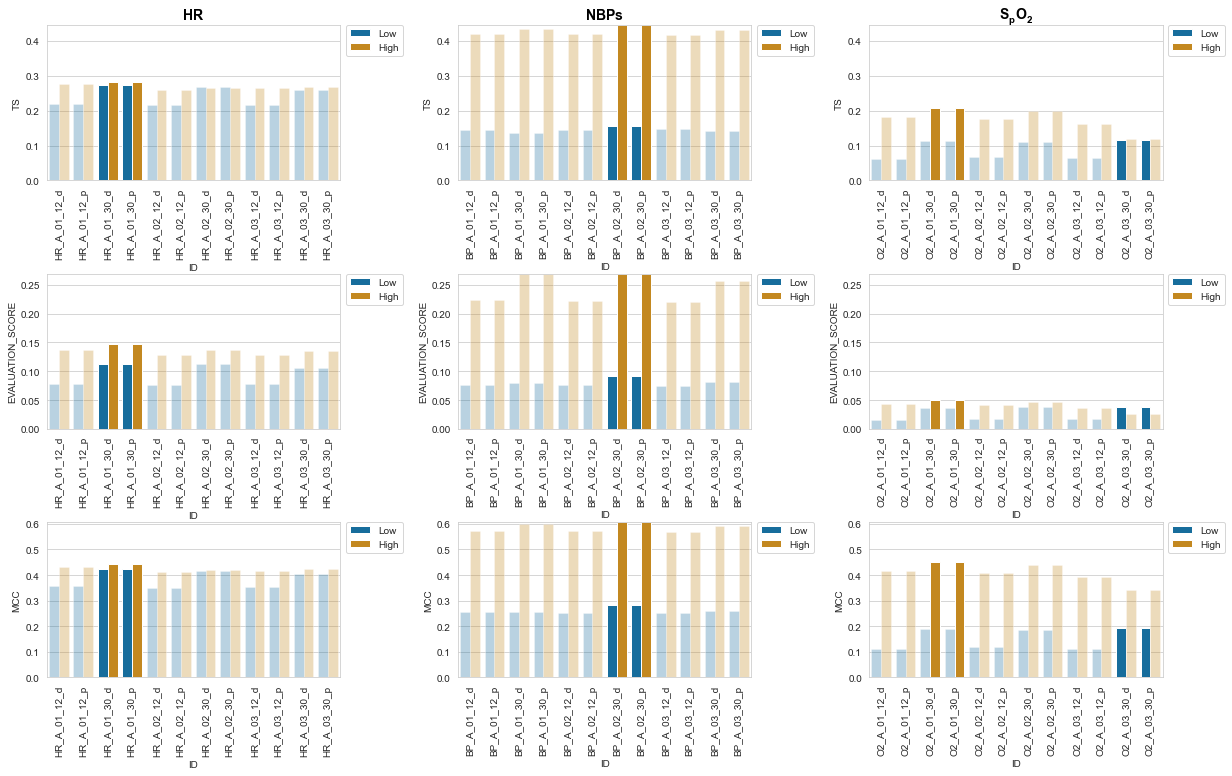

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    3,
    3,
    figsize=(20, 12),
    dpi=72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ts_ylimits = [0, max(overview.TS)]
evaluation_score_ylimits = [0, max(overview.EVALUATION_SCORE)]
mcc_ylimits = [0, max(overview.MCC)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax=axs[0,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TS',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0, i].set_title(str(parameter_label[i]), fontweight='bold', color='black', fontsize=14)
    axs[0, i].set_ylim(ts_ylimits)
    axs[0, i].tick_params(axis="x", rotation=90)
    axs[0, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_ts_low = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TS.max()]['TS'].unique()
    best_ts_high = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TS.max()]['TS'].unique()

    for bar in plot1.patches:
        if bar.get_height() != best_ts_low and bar.get_height() != best_ts_high :
            bar.set_alpha(0.3)

    plot2 = sns.barplot(
        ax=axs[1,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    
    axs[1, i].set_ylim(evaluation_score_ylimits)
    axs[1, i].tick_params(axis="x", rotation=90)
    axs[1, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()

    for bar in plot2.patches:
        if bar.get_height() != best_evaluation_score_low and bar.get_height() != best_evaluation_score_high :
            bar.set_alpha(0.3)

    plot3 = sns.barplot(
        ax=axs[2,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='MCC',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    
    axs[2, i].set_ylim(mcc_ylimits)
    axs[2, i].tick_params(axis="x", rotation=90)
    axs[2, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_mcc_low = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].MCC.max()]['MCC'].unique()
    best_mcc_high = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].MCC.max()]['MCC'].unique()

    for bar in plot3.patches:
        if bar.get_height() != best_mcc_low and bar.get_height() != best_mcc_high :
            bar.set_alpha(0.3)

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_new_metrics' + timestamp + '.png'), dpi=360, bbox_inches='tight')

plt.show(fig)

## Visualize FPR and F1 Score 

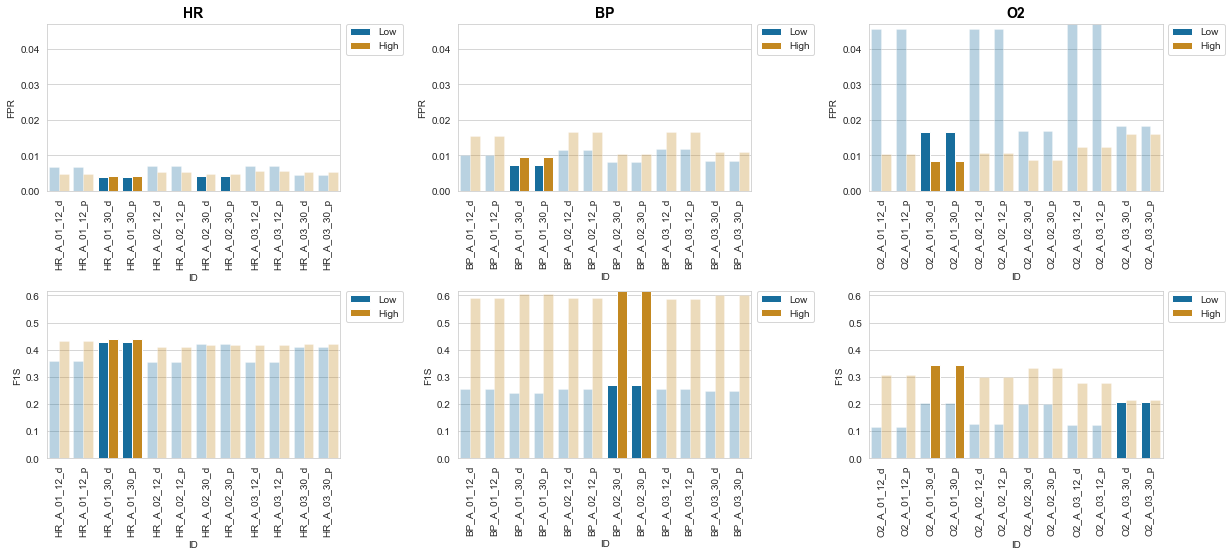

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    2,
    3,
    figsize=(20, 8),
    dpi=72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

fpr_ylimits = [0,max(overview.FPR)]
f1s_ylimits = [0,max(overview.F1S)]

parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='FPR',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(fpr_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_fpr_low = plotdata[plotdata.FPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].FPR.min()]['FPR'].unique()
    best_fpr_high = plotdata[plotdata.FPR == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].FPR.min()]['FPR'].unique()

    for bar in plot1.patches:
        if bar.get_height() != best_fpr_low and bar.get_height() != best_fpr_high :
            bar.set_alpha(0.3)

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='F1S',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1,i].set_ylim(f1s_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_f1s_low = plotdata[plotdata.F1S == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].F1S.max()]['F1S'].unique()
    best_f1s_high = plotdata[plotdata.F1S == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].F1S.max()]['F1S'].unique()

    for bar in plot2.patches:
        if bar.get_height() != best_f1s_low and bar.get_height() != best_f1s_high :
            bar.set_alpha(0.3)
    

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_old_metrics' + timestamp + '.png'), dpi=360, bbox_inches='tight')

plt.show(fig)

## Visualize Evaluation Score Only (Model Selection)

In [22]:
# reduce to darts
arimax_overview_red = arimax_overview[arimax_overview.LIBRARY != 'pmdarima']

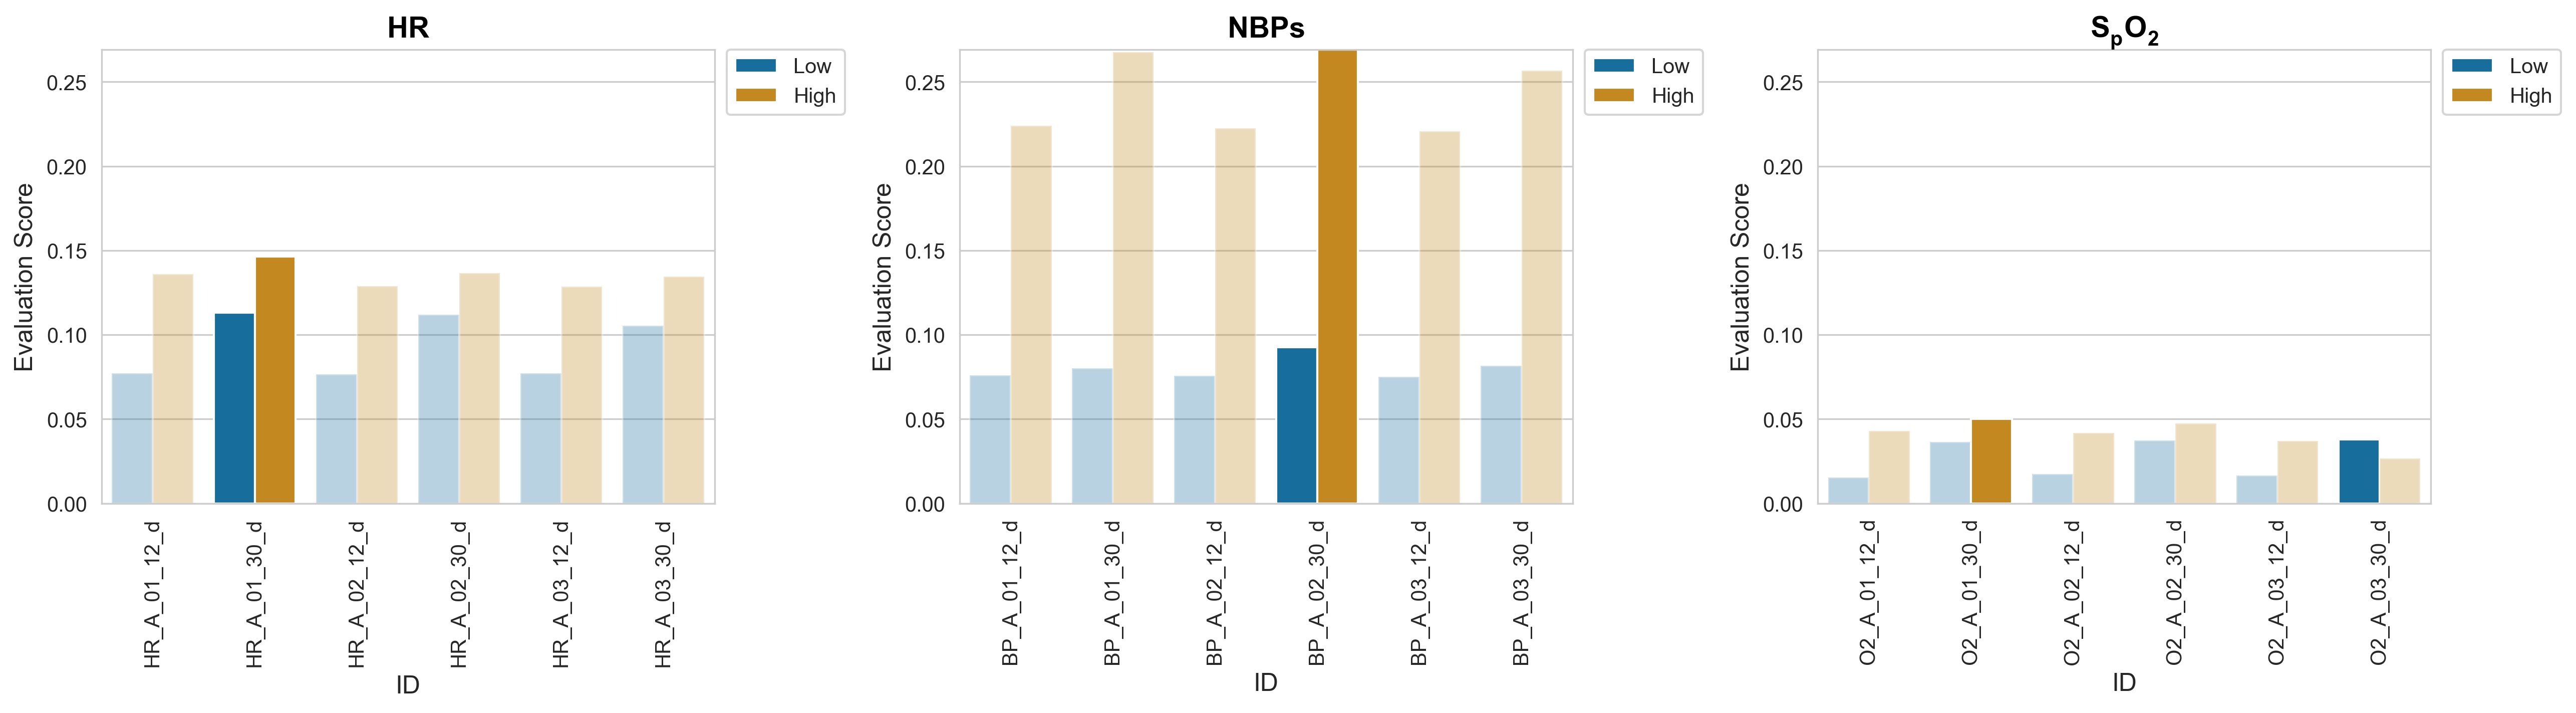

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview_red

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]


for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_xlabel('ID',fontsize=12)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    for bar in plot1.patches:
        if bar.get_height() != best_evaluation_score_low and bar.get_height() != best_evaluation_score_high :
            bar.set_alpha(0.3)
 

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_score_arima-x_first15000_' + timestamp + '.png'), dpi=300, bbox_inches='tight')  

    

plt.show(fig)

## Library Comparison: pmdarima vs darts


### Evaluation Score

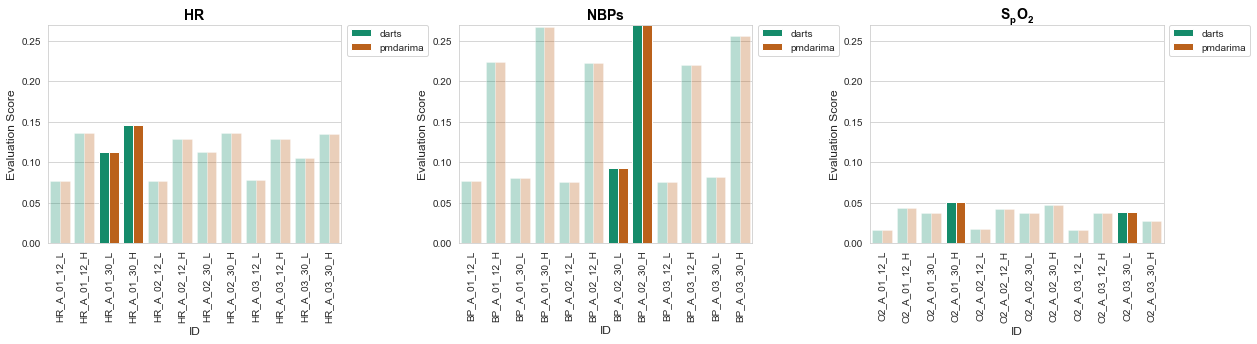

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_d', '_p'], ['', ''], regex=True)

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]


for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='LIBRARY',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()

    for bar in plot1.patches:
        if bar.get_height() != best_evaluation_score_low and bar.get_height() != best_evaluation_score_high :
            bar.set_alpha(0.3)

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'comparison_pmd_vs_darts_evaluation_score_first15000_transparent' + timestamp + '.png'), dpi=360, bbox_inches='tight') 


plt.show(fig)

Without Transparency

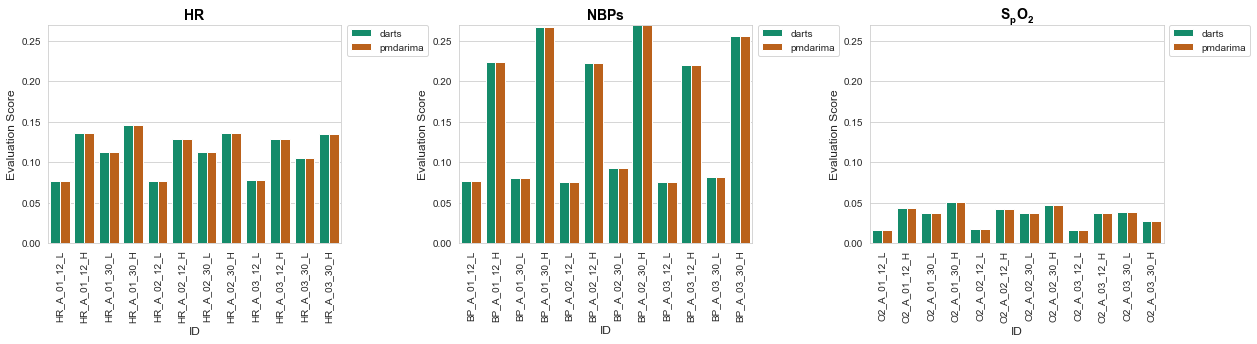

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_d', '_p'], ['', ''], regex=True)

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]


for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='LIBRARY',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'comparison_pmd_vs_darts_evaluation_score_first15000' + timestamp + '.png'), dpi=360, bbox_inches='tight') 


plt.show(fig)

Visualize Runtime

In [2]:
import pandas as pd
model_overview_with_runtimes = pd.read_parquet('../data/arima-x_runtime_first15000.parquet', engine='pyarrow')

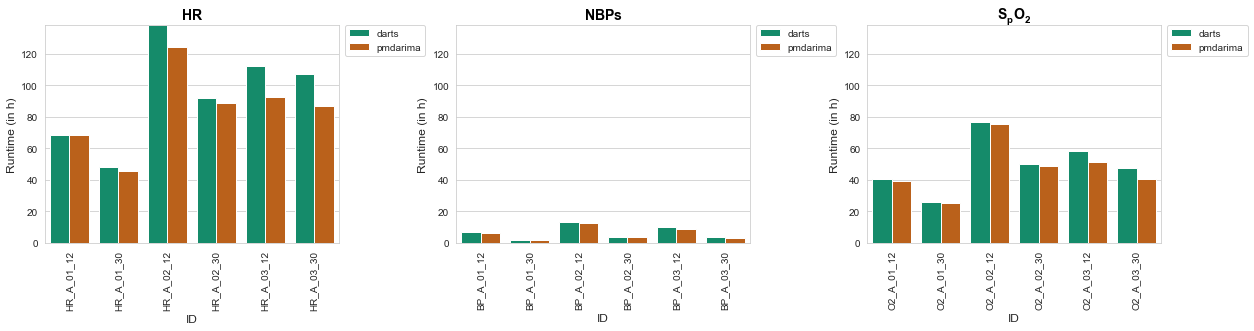

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = model_overview_with_runtimes

sns.set_style("whitegrid")

plotdata = overview.replace( ['_d', '_p'], ['', ''], regex=True)
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

runtime_ylimits = [0,max(overview.RUNTIME_IN_H)]


for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='MODEL_ID_SHORT',
        y='RUNTIME_IN_H',
        hue='LIBRARY',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Runtime (in h)', fontsize=12)
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_ylim(runtime_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'runtime_analysis_darts_pmd' + timestamp + '.png'), dpi=360, bbox_inches='tight')



plt.show(fig)

### Value Errors

In [6]:
import pandas as pd
model_overview_with_ve = pd.read_parquet('../data/arima-x_value-errors_first15000.parquet', engine='pyarrow')


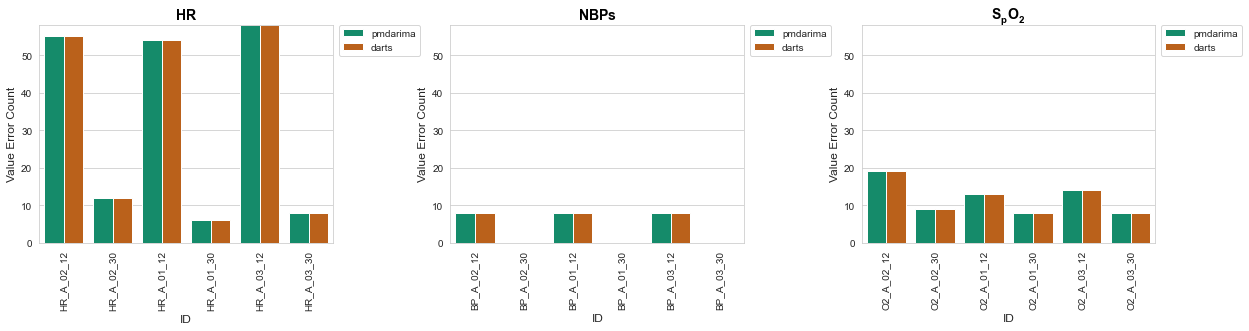

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = model_overview_with_ve

sns.set_style("whitegrid")

plotdata = overview.replace( ['_d', '_p'], ['', ''], regex=True)

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

value_errors_ylimits = [0,max(overview.N_ROWS_WITH_VALUE_ERRORS)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]


for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='MODEL_ID_SHORT',
        y='N_ROWS_WITH_VALUE_ERRORS',
        hue='LIBRARY',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Value Error Count', fontsize=12)
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_ylim(value_errors_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'value_error_analysis_darts_pmd' + timestamp + '.png'), dpi=360, bbox_inches='tight')



plt.show(fig)

## Train Size Comparison: 12 vs 30

All Configurations

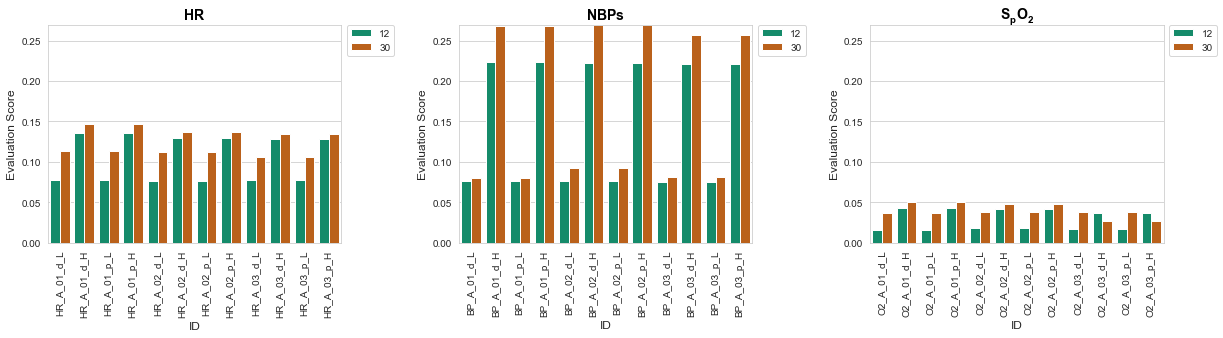

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_12', '_30'], ['', ''], regex=True)

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]


for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='FIRST_FORECAST',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'comparison_pmd_vs_darts_evaluation_score_first15000' + timestamp + '.png'), dpi=360, bbox_inches='tight') 


plt.show(fig)

Darts Only

In [41]:
arimax_overview_red = arimax_overview[arimax_overview.LIBRARY != 'pmdarima']

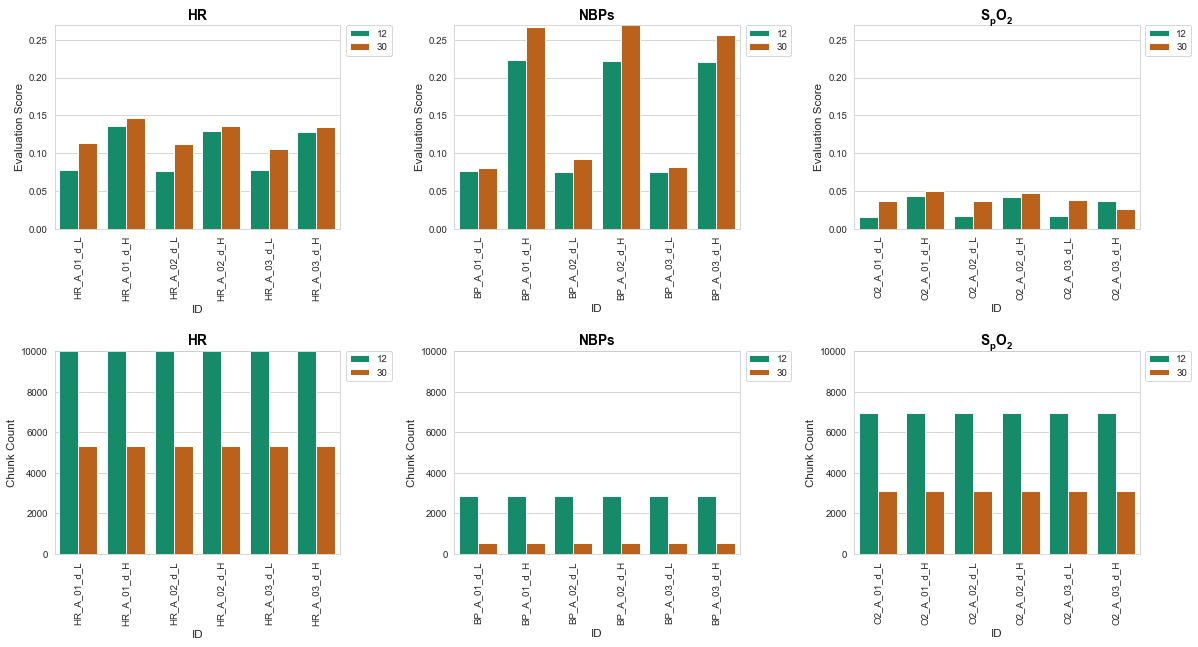

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

overview = arimax_overview_red

sns.set_style("whitegrid")

plotdata = overview.replace( ['_12', '_30'], ['', ''], regex=True)
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

fig, axs = plt.subplots(
    2,
    3,
    figsize = (20, 10),
    dpi = 70
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]
n_chunks_ylimits = [0,max(overview.N_CHUNKS)]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='FIRST_FORECAST',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[0,i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_xlabel('ID', fontsize=12)
    axs[0,i].set_ylabel('Evaluation Score', fontsize=12)
    axs[0,i].set_ylim(evaluation_score_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='N_CHUNKS',
        hue='FIRST_FORECAST',
        palette = sns.color_palette("colorblind")[2:4],
        ci=None)
    axs[1,i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[1,i].set_xlabel('ID', fontsize=12)
    axs[1,i].set_ylabel('Chunk Count', fontsize=12)
    axs[1,i].set_ylim(n_chunks_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'comparison_12_vs_30_evaluation_score_and_chunks_first15000' + timestamp + '.png'), dpi=360, bbox_inches='tight') 


plt.show(fig)